<a href="https://colab.research.google.com/github/aakarsh7599/Text-Detection-using-Detectron2/blob/master/Inference_from_saved_model_Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "Text_Detection_Dataset_COCO_Format.zip"

/content
Archive:  drive/My Drive/Capstone/board1.zip
   creating: board1/
   creating: board1/train/
  inflating: board1/train/0.jpeg     
  inflating: board1/train/1.jpeg     
  inflating: board1/train/10.jpeg    
  inflating: board1/train/100.jpeg   
  inflating: board1/train/101.jpeg   
  inflating: board1/train/102.jpeg   
  inflating: board1/train/103.jpeg   
  inflating: board1/train/104.jpeg   
  inflating: board1/train/105.jpeg   
  inflating: board1/train/106.jpeg   
  inflating: board1/train/107.jpeg   
  inflating: board1/train/108.jpeg   
  inflating: board1/train/109.jpeg   
 extracting: board1/train/11.jpeg    
  inflating: board1/train/110.jpeg   
  inflating: board1/train/111.jpeg   
  inflating: board1/train/112.jpeg   
  inflating: board1/train/113.jpeg   
  inflating: board1/train/114.jpeg   
  inflating: board1/train/115.jpeg   
  inflating: board1/train/116.jpeg   
  inflating: board1/train/117.jpeg   
  inflating: board1/train/118.jpeg   
  inflating: board1/trai

In [ ]:
!cp -r "/content/drive/My Drive/Capstone/output-79.0" "/content" #Copy your saved model

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 28kB/s 
     |████████████████████████████████| 6.6MB 51.8MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101
     |████████████████████████████████| 276kB 7.0MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=ab03c627d99f94d15d32358b66ee61230613cda0f9d867036ee219ded9c1c6d6
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 774kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200716-cp36-none-any.whl size=42325 sha256=c14cb0d9c7f246483bdd6a23e99faf2c8a2d2a74254f2e989af02ca00a88e7f4
  Stored in directory: /root/.cache/pip/wheels/81/99/f4/42a6bef61c07b3d78dfe6d7ebff259444c4526504cf72378d7
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
import json
from detectron2.structures import BoxMode
json_file = "board1/train/dataset.json"
with open(json_file) as f:
    dataset_dicts = json.load(f)
for i in dataset_dicts:
  for j in i["annotations"]:
    j["bbox_mode"] = BoxMode.XYWH_ABS
    print(j['category_id'])
print(dataset_dicts[0])

0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
1
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
333
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1


In [ ]:
def get_board_dicts(imgdir):
    json_file = imgdir+"/dataset.json"
    with open(json_file) as f:
        dataset_dicts = json.load(f)
    for i in dataset_dicts:
        filename = i["file_name"] 
        i["file_name"] = imgdir+"/"+filename 
        for j in i["annotations"]:
            j["bbox_mode"] = BoxMode.XYWH_ABS
            label = j["category_id"]
            if label == "##::OTHER":
              label = 2
            else:
              j["category_id"] = int(label)
    return dataset_dicts
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "val"]:
    DatasetCatalog.register("boardetect_" + d, lambda d=d: get_board_dicts("board1/" + d))
    MetadataCatalog.get("boardetect_" + d).set(thing_classes=["HINDI","ENGLISH","OTHER"])
board_metadata = MetadataCatalog.get("boardetect_train")

[{'image_id': 0, 'file_name': 'board1/train/0.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [122, 207, 173, 70], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [291, 213, 181, 70], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [464, 214, 117, 73], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}, {'image_id': 1, 'file_name': 'board1/train/1.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [13, 70, 156, 73], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [174, 59, 275, 57], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [448, 35, 172, 59], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}, {'image_id': 2, 'file_name': 'board1/train/2.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [25, 1, 412, 157], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [457, 49, 253, 103], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}, {'image_id': 3, 'file_name':

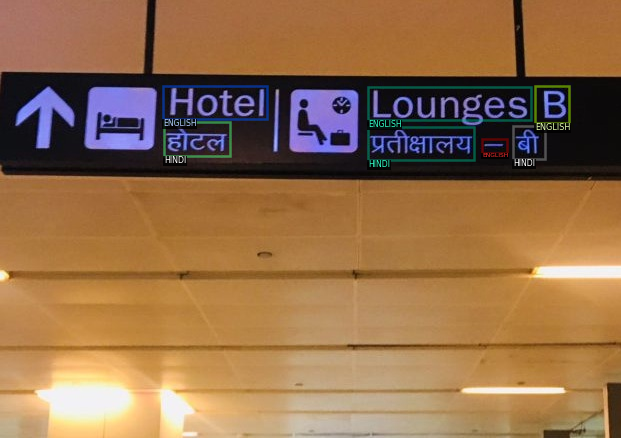

{'image_id': 61, 'file_name': 'board1/train/61.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [21, 105, 266, 75], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [297, 106, 250, 65], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [557, 102, 147, 60], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [417, 104, 74, 12], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}


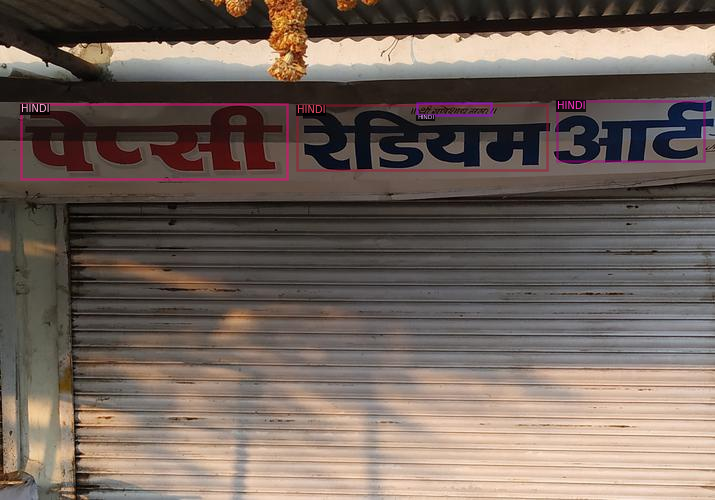

{'image_id': 357, 'file_name': 'board1/train/357.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [117, 70, 95, 37], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [222, 39, 70, 57], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [300, 48, 198, 23], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [54, 143, 107, 42], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [162, 131, 160, 32], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [329, 115, 41, 40], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [373, 108, 214, 20], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}]}


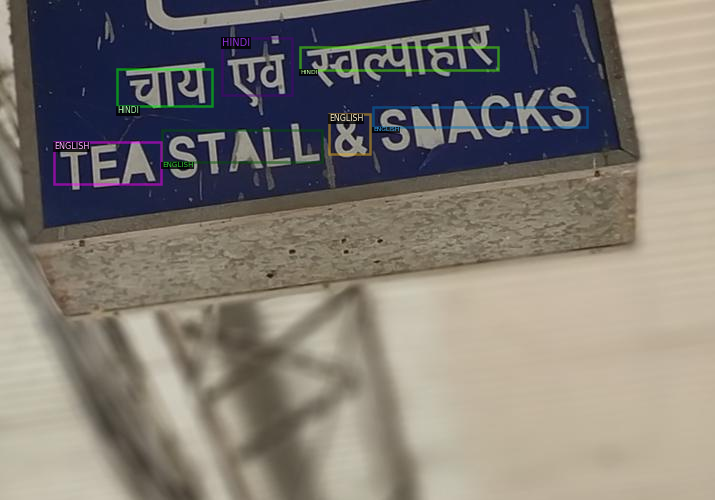

{'image_id': 323, 'file_name': 'board1/train/323.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [82, 92, 140, 145], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [287, 97, 151, 139], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [482, 60, 146, 183], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [88, 306, 128, 146], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [316, 306, 115, 143], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [507, 307, 120, 148], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}


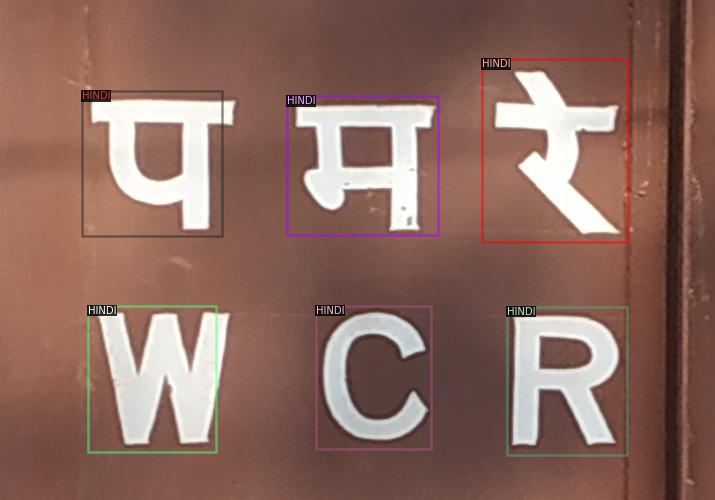

{'image_id': 125, 'file_name': 'board1/train/125.jpeg', 'height': 395, 'width': 395, 'annotations': [{'bbox': [122, 84, 180, 68], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [55, 158, 189, 44], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [266, 135, 111, 63], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 2}]}


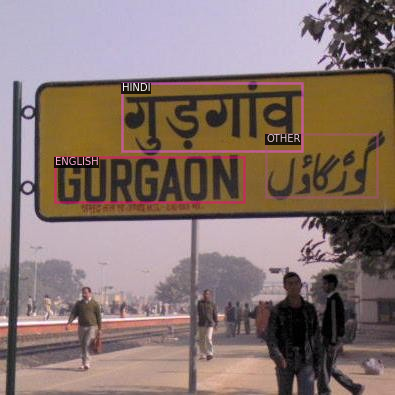

{'image_id': 287, 'file_name': 'board1/train/287.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [92, 217, 615, 103], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [109, 390, 525, 91], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}]}


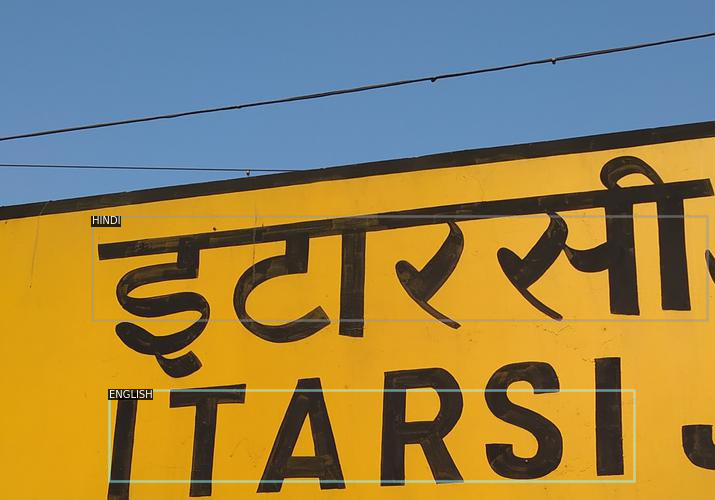

{'image_id': 296, 'file_name': 'board1/train/296.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [234, 141, 167, 121], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [420, 170, 63, 106], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [488, 216, 69, 63], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [277, 237, 246, 141], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}


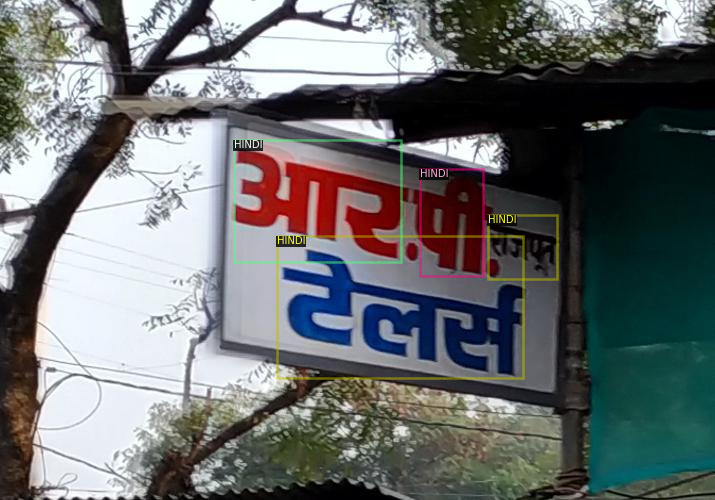

{'image_id': 332, 'file_name': 'board1/train/332.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [33, 45, 188, 113], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [253, 27, 198, 124], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [466, 30, 226, 126], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}]}


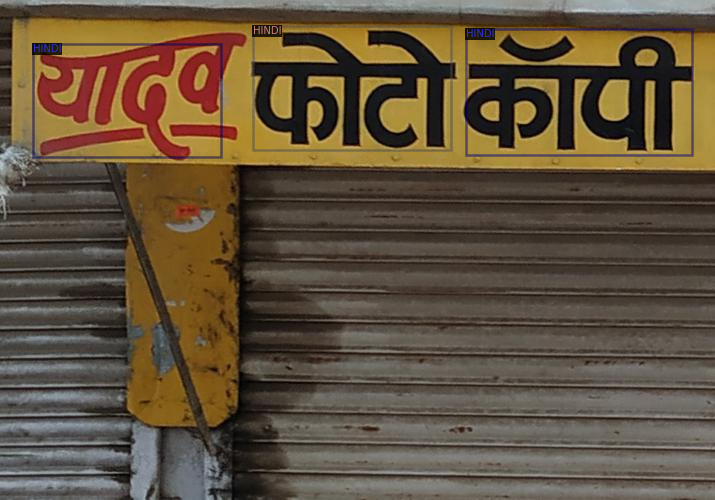

{'image_id': 222, 'file_name': 'board1/train/222.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [85, 330, 340, 154], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [412, 356, 287, 136], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [337, 310, 260, 78], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}]}


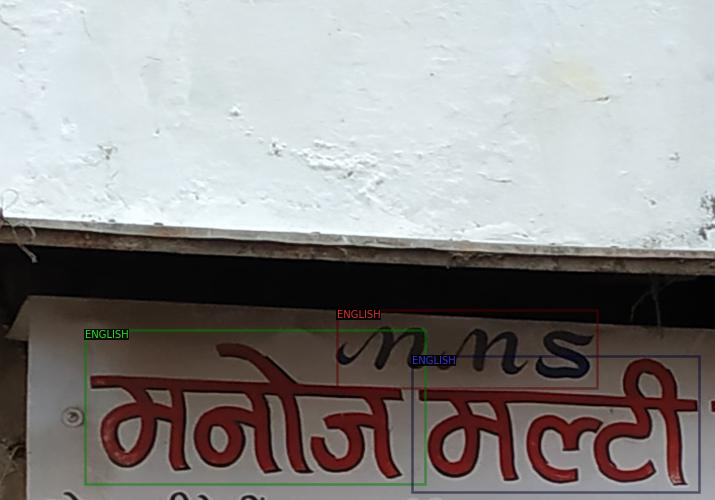

{'image_id': 371, 'file_name': 'board1/train/371.jpeg', 'height': 500, 'width': 715, 'annotations': [{'bbox': [161, 20, 156, 132], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [335, 39, 48, 115], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [391, 72, 36, 85], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [432, 81, 39, 79], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 0}, {'bbox': [474, 85, 27, 85], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [149, 180, 199, 108], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [353, 201, 68, 81], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [419, 202, 28, 87], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [452, 204, 31, 89], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}, {'bbox': [483, 212, 27, 87], 'bbox_mode': <BoxMode.XYWH_ABS: 1>, 'category_id': 1}]}


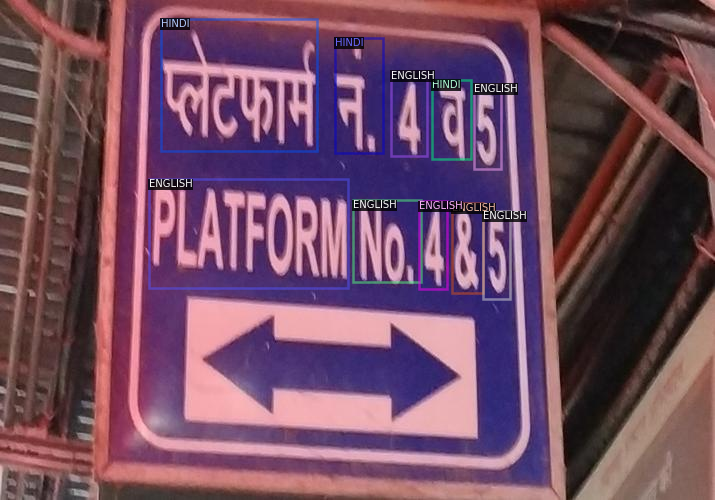

In [ ]:
dataset_dicts = get_board_dicts("board1/train")
print(dataset_dicts)
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    print(d)
    visualizer = Visualizer(img[:, :, ::-1], metadata=board_metadata)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # set threshold for this model
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/My Drive/Capstone/output-79.0", "model_final.pth")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3
predictor = DefaultPredictor(cfg)

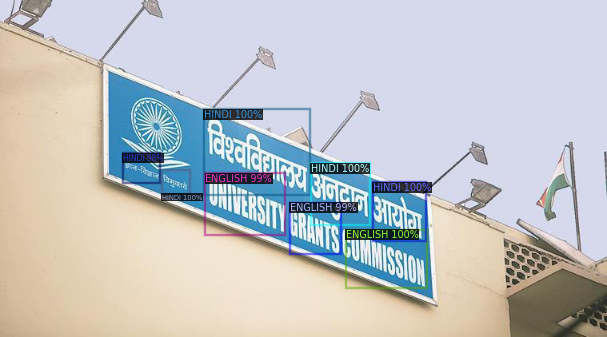

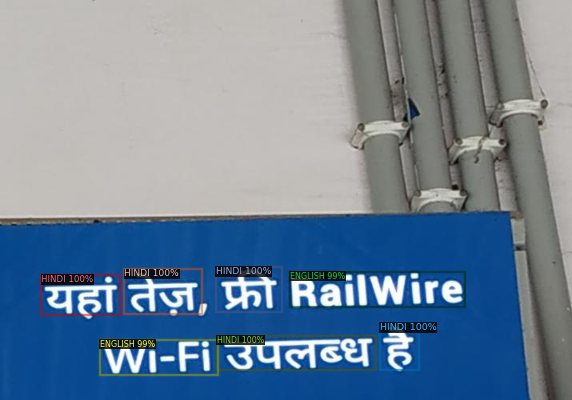

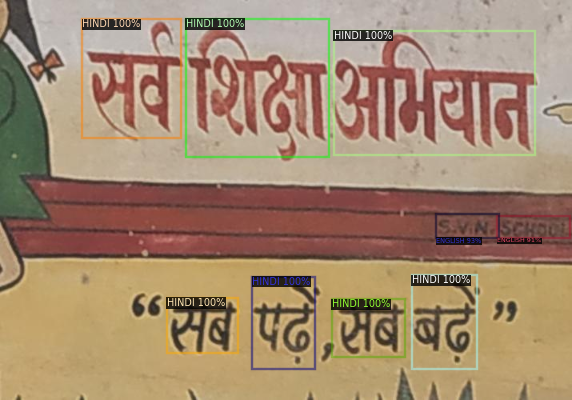

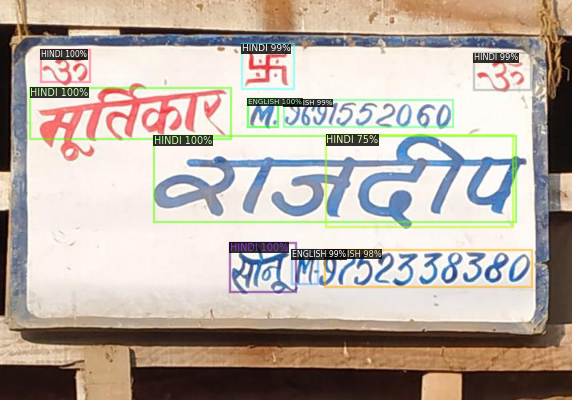

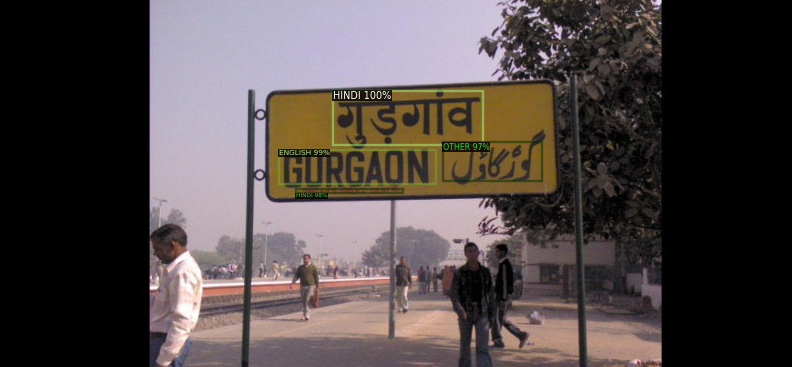

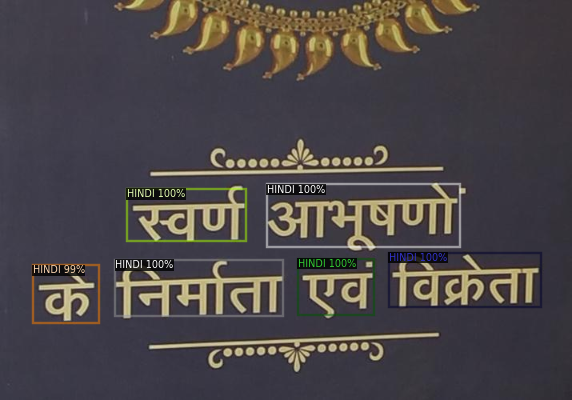

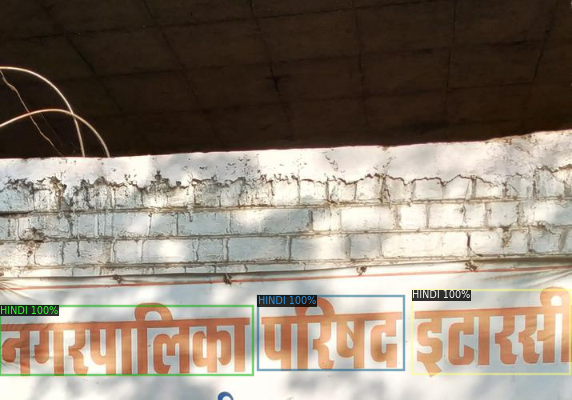

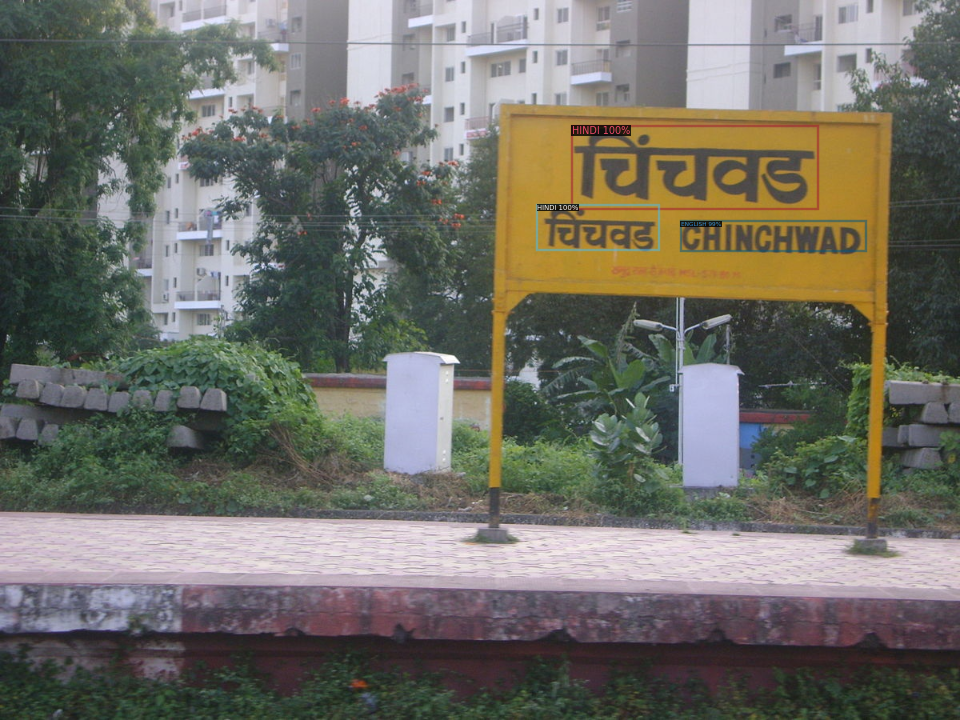

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_board_dicts("board1/train")
for d in random.sample(dataset_dicts, 8):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=board_metadata, 
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])